<h4>Pre pruning is used especially for overfitting, pre-pruning is cutting dataa in half 
</h4>
<p>Pre purning is done using max_depth in the function DecisionTreeClassifier, post pruning is dnoe using cost_complexity_pruning_path, with cco_alphas</p>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("../dataset/social_networking_ads_column_filtered.csv")

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
x = df.iloc[:,:-1]
y = df['Purchased']

In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [9]:
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [10]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [34]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [15]:
dt1 = DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
dt.score(x_test,y_test)

0.9

In [17]:
dt1.predict([[46,28000]])

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [18]:
df.sample(10)

,Age,EstimatedSalary,Purchased
37,30,49000,0
138,28,59000,0
254,50,44000,0
398,36,33000,0
392,45,45000,1
285,37,93000,1
268,47,144000,1
188,35,72000,0
374,37,80000,0
181,31,71000,0


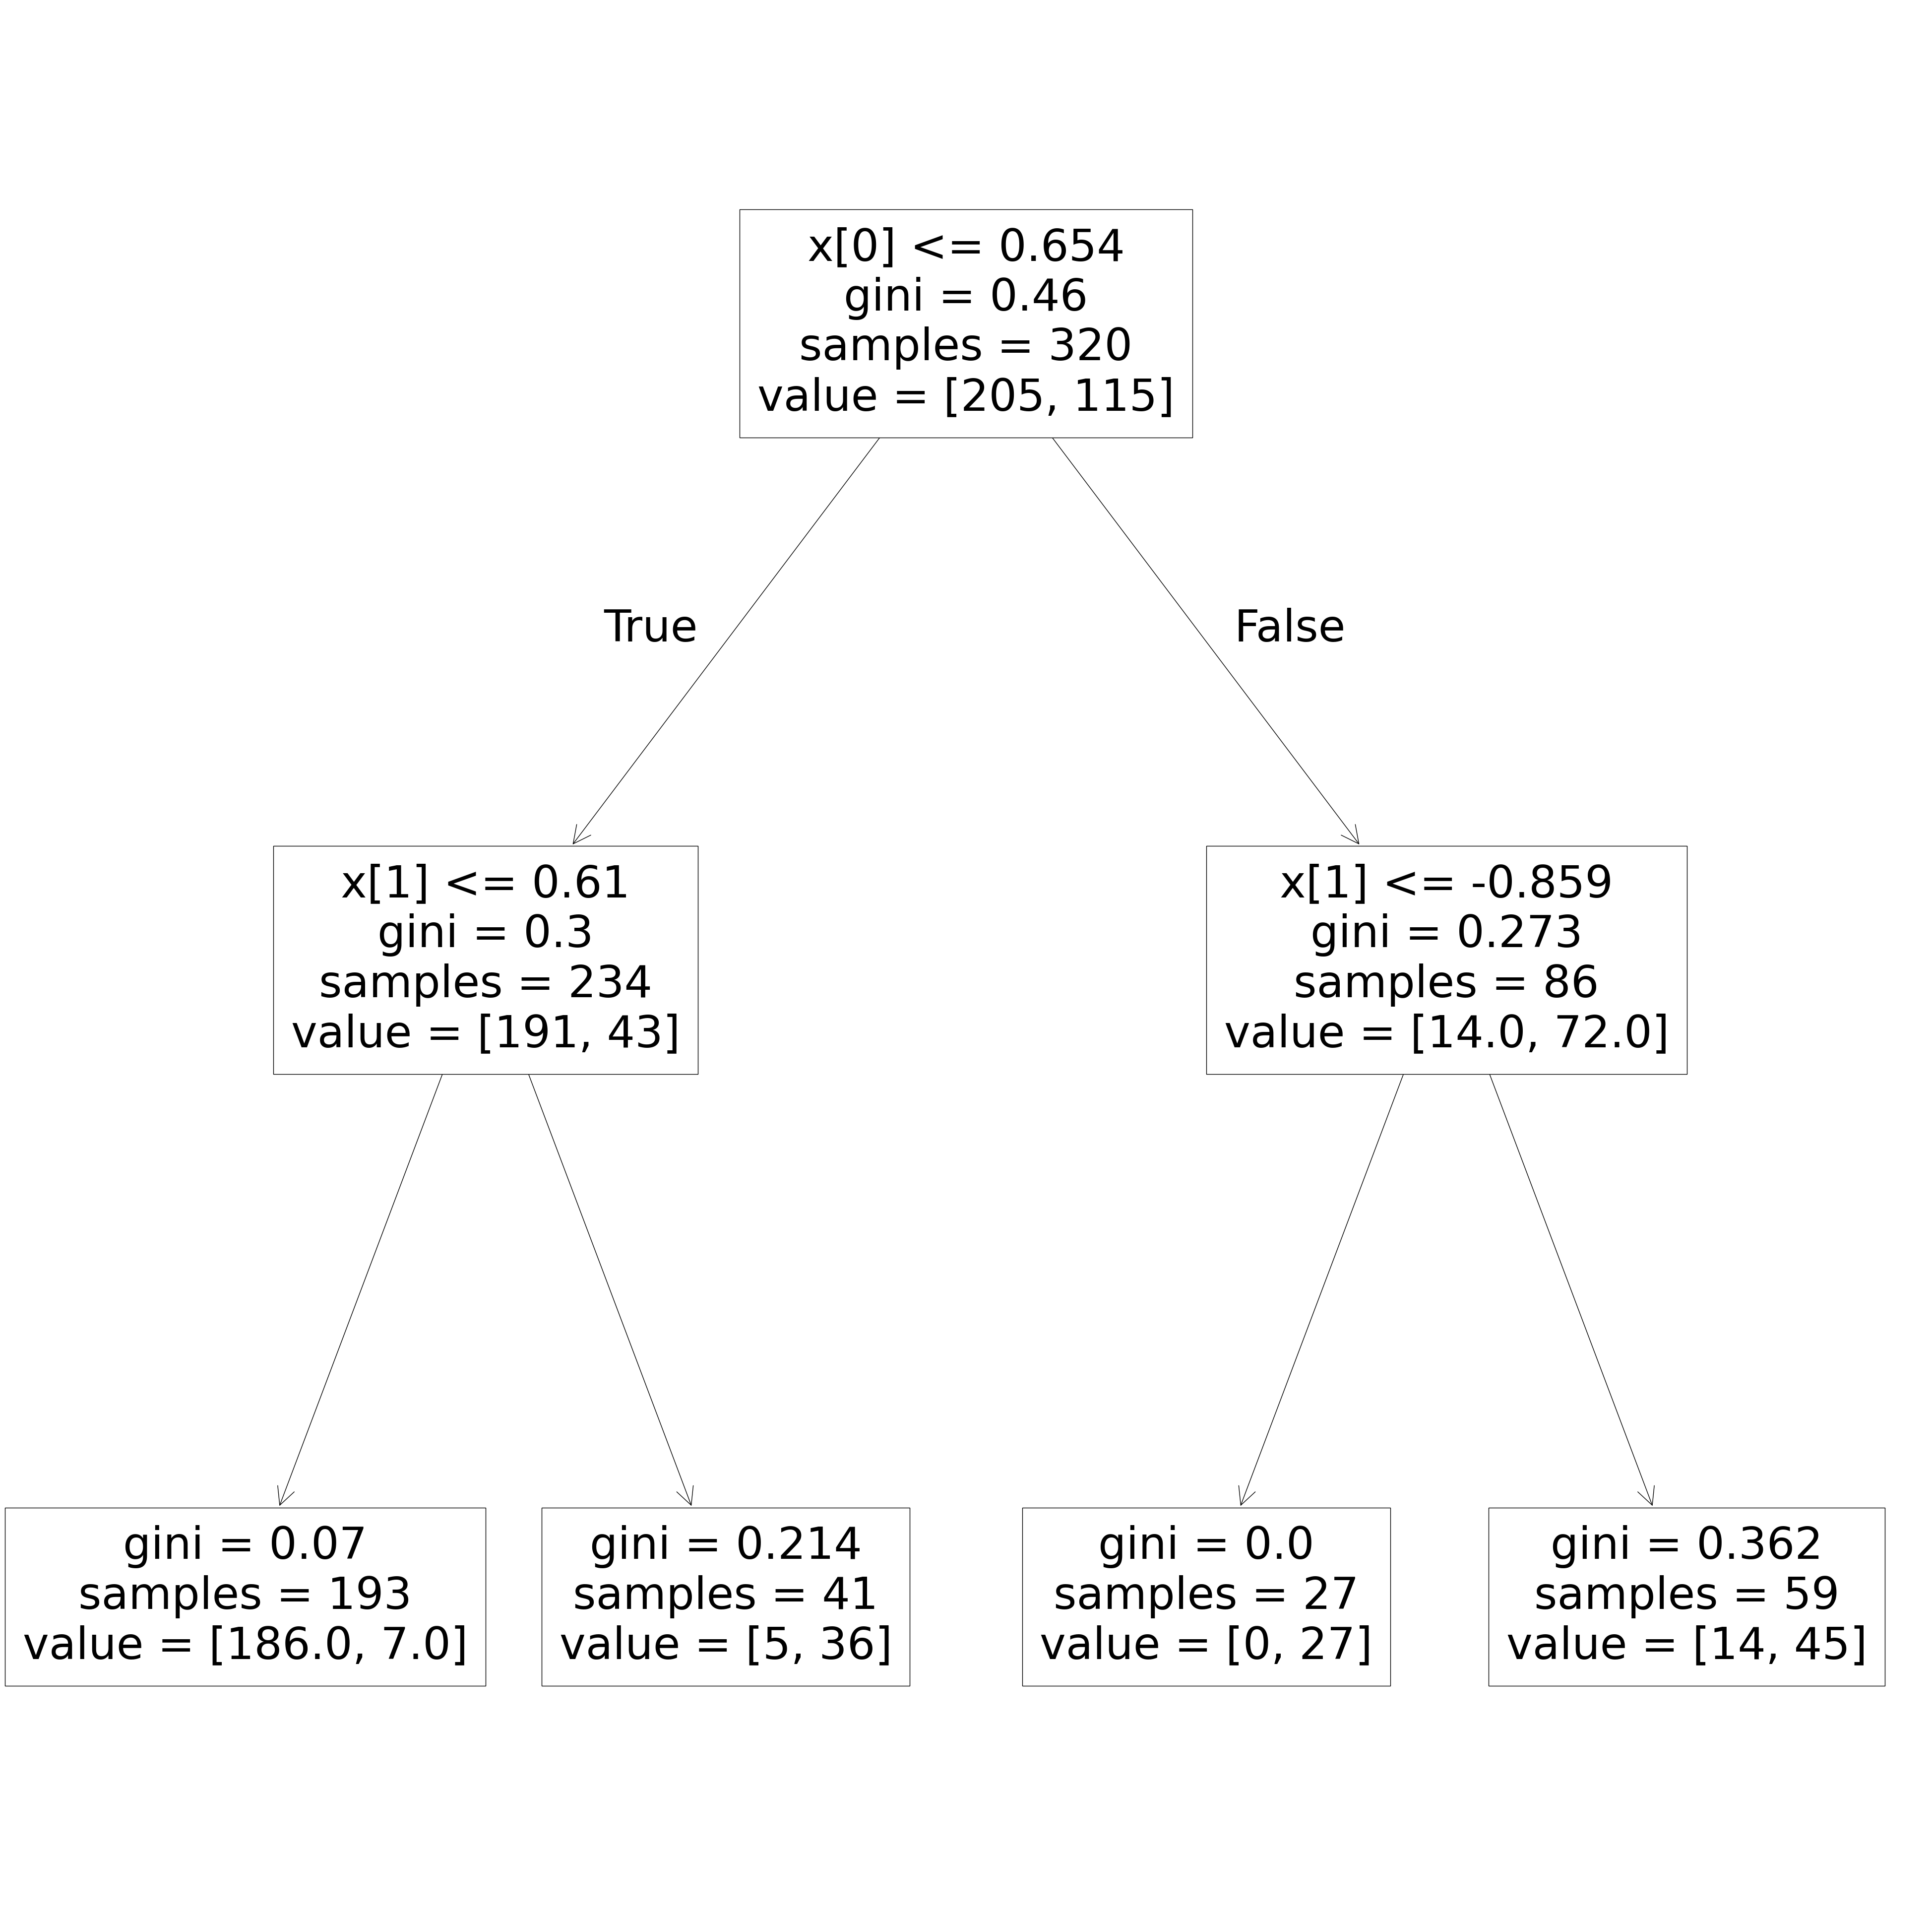

In [38]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("demo_max_depth_2.jpg")
plt.show()

In [36]:
from mlxtend.plotting import plot_decision_regions

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

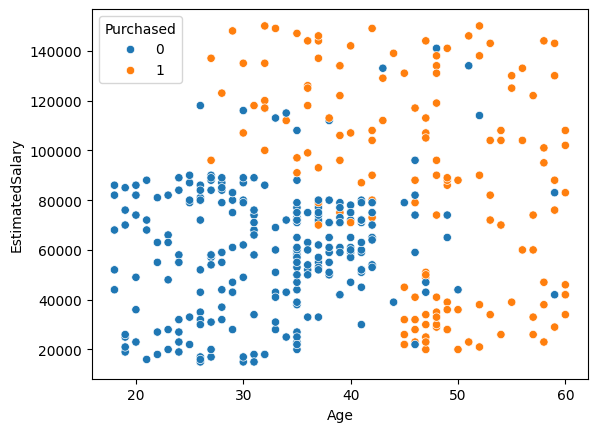

In [39]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=df,hue="Purchased")

c:\Users\DELL\.conda\envs\pandasNumpyMatplotlibPrac\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

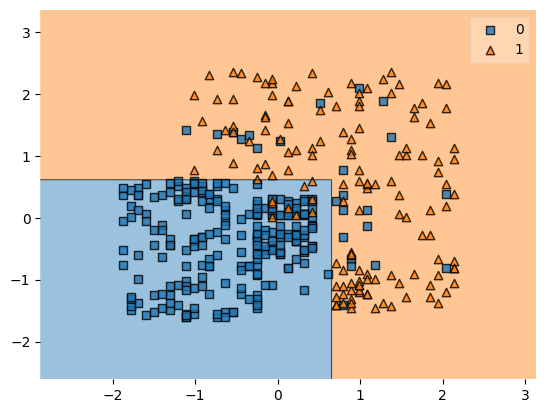

In [40]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)

In [33]:
#checking best max depth value 
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print("score",dt2.score(x_train,y_train),dt2.score(x_test,y_test),i)

score 0.821875 0.9 1
score 0.91875 0.9125 2
score 0.91875 0.9125 3
score 0.93125 0.9125 4
score 0.934375 0.9 5
score 0.95 0.8625 6
score 0.96875 0.85 7
score 0.971875 0.85 8
score 0.98125 0.85 9
score 0.984375 0.85 10
score 0.990625 0.8375 11
score 0.990625 0.8375 12
score 0.99375 0.8375 13
score 0.996875 0.8375 14
score 0.996875 0.8375 15
score 0.996875 0.8375 16
score 0.996875 0.8375 17
score 0.996875 0.8375 18
score 0.996875 0.8375 19


<h4>This is example code for post pruning </h4>

In [ ]:



# from sklearn.tree import DecisionTreeClassifier

# # Grow the tree fully
# model = DecisionTreeClassifier()

# # Fit the model
# model.fit(X_train, y_train)

# # Perform cost-complexity pruning
# path = model.cost_complexity_pruning_path(X_train, y_train)
# ccp_alphas = path.ccp_alphas

# # Train models with different ccp_alpha values
# pruned_models = []
# for ccp_alpha in ccp_alphas:
#     pruned_model = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
#     pruned_model.fit(X_train, y_train)
#     pruned_models.append(pruned_model)

# # Select the best model based on validation performance
# best_model = pruned_models[np.argmax([model.score(X_val, y_val) for model in pruned_models])]